In [1]:
import scipy.io as sio
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from scipy.spatial import distance
from datetime import datetime

In [2]:
content = sio.loadmat('face-images.mat')

In [3]:
train = content["train"]

In [4]:
train[0][0].T[0].shape

(168, 192)

In [5]:
train[0][0].transpose().reshape(50, 192*168).shape

(50, 32256)

In [6]:
X = []
Y = []
for i in range(train.shape[1]):
    print (train[0][i].transpose().reshape(50, 192*168).shape)
    X.append(train[0][i].transpose().reshape(50, 192*168))
    Y += [i for j in range(50)]
X = np.array(X)
X = X.reshape(10*50,192*168)

(50, 32256)
(50, 32256)
(50, 32256)
(50, 32256)
(50, 32256)
(50, 32256)
(50, 32256)
(50, 32256)
(50, 32256)
(50, 32256)


In [7]:
len(Y)

500

In [8]:
train_data = []
for i in range(X.shape[0]):
    train_data.append([Y[i], X[i]])

In [9]:
X.shape

(500, 32256)

In [10]:
def PCA(X, k):
    U, s, V = np.linalg.svd(X, full_matrices = False)
    U_reduced = U[:, : k]
    return (U_reduced*s[:k])

In [12]:
components = PCA(X, 100)

In [13]:
X_transformed = components

In [14]:
X_transformed.shape

(500, 100)

In [15]:
colors = ['r','g','b','c','m','y','k','deepskyblue','pink','lime']

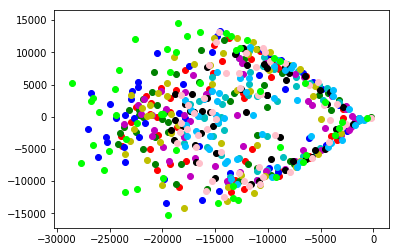

In [16]:
x_component = []
y_component = []
for i in range(0, len(X_transformed)):
    component = X_transformed[i]
    x_component.append(component[0])
    y_component.append(component[1])
    plt.scatter(component[0], component[1], color=colors[Y[i]])

Fig. 1

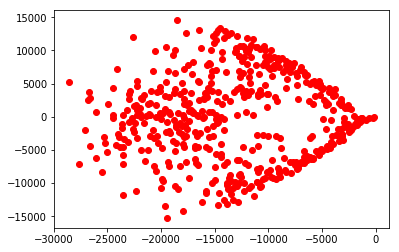

In [17]:
plt.plot(x_component, y_component, 'ro')

Fig 2.

In [18]:
# Calculate the distance
def calculate_distance(a,b):
    #return distance.euclidean(a,b)
    return np.linalg.norm(a-b)

In [19]:
# Calculate the centroids for each cluster
def calculate_centroids(X, centroids, clusters):
    for i in range (0, len(clusters)):
        images = []
        for index in clusters[i]:
            images.append(X[index])
        np_array = np.array(images)
        centroids[i] = np_array.mean(axis = 0)

    return centroids

In [20]:
# Calculate the initial clusters so we can iterate and recluster
# This basically does the first iteration of kmeans algorithm
def make_clusters(X, centroids, k):
    clusters = [[] for i in range(0, k)]
    for i in range(0, X.shape[0] - 1):
        distances = []
        for j in range(0, k):
            distance = calculate_distance(X[i], centroids[j])
            distances.append((distance, j))
        distances = sorted(distances)
        cluster_number = distances[0][1]
        clusters[cluster_number].append(i)
    return clusters

In [21]:
# Remake clusters based on new centroids
def recreate_cluster(clusters, centroids, X):
    reclustered = False

    # for every cluster in k clusters we will re create cluster 
    # based on the newly updated centroids
    for i in range(0, len(clusters)):
        cluster = clusters[i]
        
        # For every data point(index) in the cluster, check if it still a part of
        # cluster i or is a part of a different cluster based on 
        # the newly updated centroid
        for data_point in cluster:
            
            distances_to_centroid = {}
            
            # Calculate the l2 norm (euclidean distance) between the data 
            # point(index) in ith cluster and the newly updated centroid 
            # of the ith cluster
            for j in range(0 , len(centroids)):
                distance = calculate_distance(X[data_point], centroids[j])
                distances_to_centroid[j] = distance
            
            # determine based on the newly calculated distance between 
            # data point and centroid, if the data point(index) should be in 
            # the ith cluster or a different cluster
            min_distance = distances_to_centroid[0]
            min_distance_index = 0
            
            # find the centroid closest to data point(index)
            for cluster_no in distances_to_centroid.keys():
                if distances_to_centroid[cluster_no] < min_distance:
                    min_distance = distances_to_centroid[cluster_no]
                    min_distance_index = cluster_no
            
            # if the data point (index) should be a part of a different
            # cluster, add it to the list of data points of that cluster
            if min_distance_index != i:
                clusters[i].remove(data_point)
                clusters[min_distance_index].append(data_point)
                reclustered = True

    return clusters, reclustered

In [22]:
def KMeans(X, k):

    X = X.transpose()
    number_of_images = X.shape[0]
    centroid_indices = np.random.randint(low=0, high=X.shape[0], size=k)

    centroids = []
    for i in range(0, len(centroid_indices)):
        centroids.append(X[centroid_indices[i]])
    clusters = make_clusters(X, centroids, k)

    i = 0
    while(i <= 50):
        centroids = calculate_centroids(X, centroids, clusters)
        clusters, reclustered = recreate_cluster(clusters, centroids, X)
        if reclustered == False:
            break
        i += 1
        
    for i in range(0, len(clusters)):
        print("Indices of data points in cluster " + str(i))
        points = ""
        for index in clusters[i]:
            points += str(index) + " "
        print (points)
        print( "\n")
    
    colors = ['r','g','b','c','m','y','k','deepskyblue','pink','lime']
    for i in range(0, len(clusters)):
        x_component = []
        y_component = []
        for index in clusters[i]:
            x_component.append(X[index][0])
            y_component.append(X[index][1])
        if k <=10:
            plt.scatter(x_component, y_component, color=colors[i])


Indices of data points in cluster 0
14 88 285 369 375 425 436 497 186 329 414 432 146 245 306 390 398 454 176 438 447 2 404 358 71 260 42 416 303 


Indices of data points in cluster 1
299 422 9 114 192 202 235 345 368 131 172 445 31 199 271 450 150 180 441 13 116 148 317 347 388 91 121 207 462 259 75 89 364 378 185 149 200 439 59 164 30 241 339 412 246 343 399 213 


Indices of data points in cluster 2
0 68 80 84 107 184 206 211 225 227 229 239 265 311 315 352 363 377 380 397 403 406 428 437 458 467 22 41 53 82 104 142 224 278 482 10 110 360 442 475 115 130 182 370 332 376 334 162 223 212 3 484 256 493 4 


Indices of data points in cluster 3
17 35 47 58 64 76 97 98 122 141 152 156 174 175 181 188 203 217 222 232 252 253 254 272 282 290 300 302 307 316 321 338 341 355 359 387 396 401 402 407 427 444 446 457 464 474 478 496 45 56 201 230 263 295 372 429 449 452 12 62 118 161 423 34 135 383 129 79 151 


Indices of data points in cluster 4
43 74 95 266 277 283 409 421 456 466 483 486 28

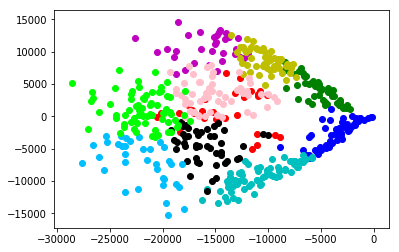

In [23]:
KMeans(X_transformed.transpose(), 10)
plt.show()

In [24]:
KMeans(X_transformed, 100)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice.
  
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Indices of data points in cluster 0
7 


Indices of data points in cluster 1
56 


Indices of data points in cluster 2
53 


Indices of data points in cluster 3
57 


Indices of data points in cluster 4
55 


Indices of data points in cluster 5
35 


Indices of data points in cluster 6
31 


Indices of data points in cluster 7
90 


Indices of data points in cluster 8
46 


Indices of data points in cluster 9
87 


Indices of data points in cluster 10
33 


Indices of data points in cluster 11
47 


Indices of data points in cluster 12
43 


Indices of data points in cluster 13
3 


Indices of data points in cluster 14
1 


Indices of data points in cluster 15
11 


Indices of data points in cluster 16
22 


Indices of data points in cluster 17
16 


Indices of data points in cluster 18



Indices of data points in cluster 19
8 


Indices of data points in cluster 20



Indices of data points in cluster 21



Indices of data points in cluster 22
41 


Indices of data points in cluster 

# Observations for different values of K

When we run the Kmeans algorithm, on smaller values of K like 10, we see that the all the clusters have data points assigned to them. In case of larger K values like 100, we can observe that the there are some clusters that have no data points and each cluster has very little data points.